In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env


In [2]:

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [5]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.label.value_counts(normalize = True)


ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [9]:

def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [11]:
spam_words

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send a150 to rcv winner as a valued network customer you have been selected to receivea a900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030 six chances to win cash from 100 to 20000 pounds txt csh11 and send to 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent you have won a 1 week free membership in our a100000 prize jackpot txt the word claim to no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub to use your credit click the wap link in the next txt message or click here httpwap xxxmobilemovieclubcomnqj

## Exploration
Represent text as word frequencies.

In [12]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [13]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


Text(0.5, 1.0, 'Ham vs Spam count for the top 20 most frequent words')

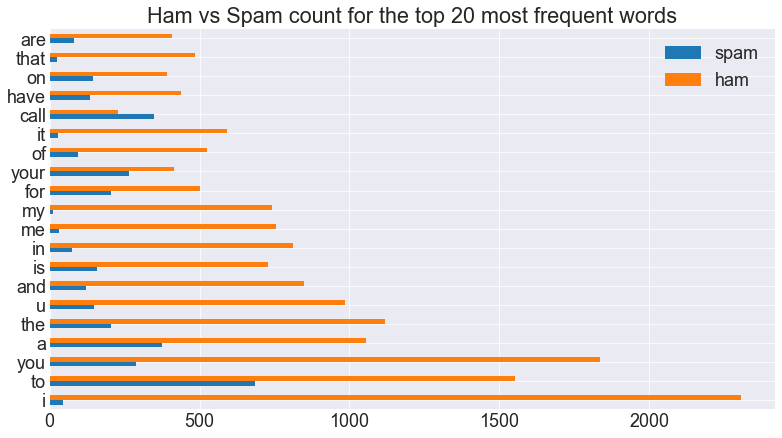

In [14]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
plt.title('Ham vs Spam count for the top 20 most frequent words')

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

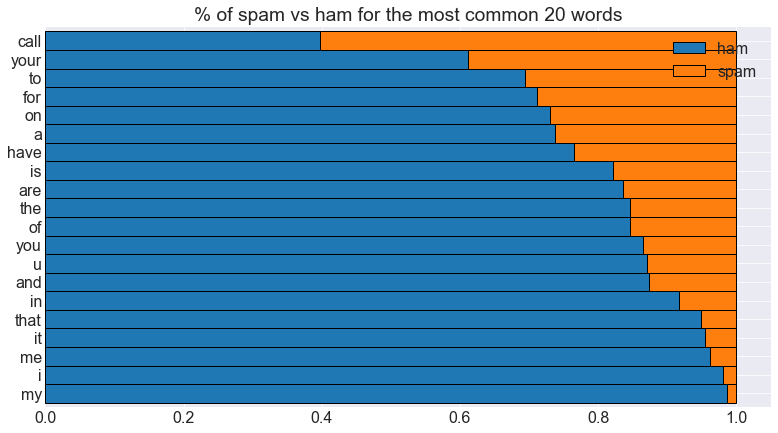

In [15]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

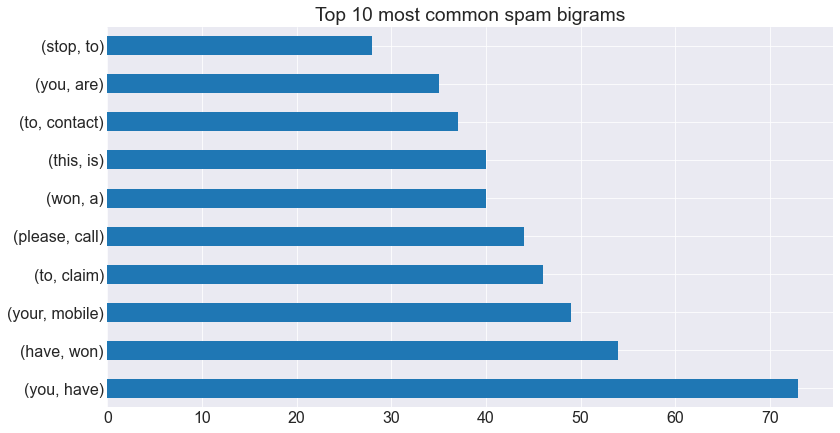

In [16]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

## Exercise 1b
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [17]:
# create function to clean data
def clean(text):
    '''
    This function takes in a string and converts all characters to lowercase, normalizes them, removes special
    characters, and returns a string
    '''
    # convert to lowercase
    text = text.lower()
    # normalize
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # return anything that is a letter, number, single quote, or white space
    return re.sub(r"[^a-z0-9\s]", '', text)

In [18]:
# clean and create a single string of all messages by label
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [20]:

# split spam words and get top 50 bigrams
top50_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_spam_bigrams

(you, have)            73
(have, won)            54
(your, mobile)         49
(to, claim)            46
(please, call)         44
(won, a)               40
(this, is)             40
(to, contact)          37
(you, are)             35
(stop, to)             28
(u, have)              27
(cash, or)             27
(a, a2000)             25
(will, be)             25
(or, a)                25
(contact, u)           24
(po, box)              24
(to, receive)          23
(a1000, cash)          23
(guaranteed, call)     23
(prize, guaranteed)    22
(with, a)              22
(for, your)            22
(win, a)               21
(a, new)               21
(have, a)              21
(contact, you)         20
(selected, to)         20
(urgent, your)         20
(to, 86688)            19
(holiday, or)          19
(every, week)          19
(attempt, to)          19
(send, stop)           19
(go, to)               19
(to, 8007)             19
(await, collection)    19
(find, out)            18
(out, who)  

In [21]:
# split ham words and get top 50 bigrams
top50_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_ham_bigrams

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(you, are)      91
(do, you)       91
(in, the)       86
(i, have)       83
(if, you)       83
(i, dont)       82
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(i, can)        71
(and, i)        71
(have, to)      70
(but, i)        70
(to, be)        66
(to, get)       65
(i, cant)       63
(on, the)       61
(need, to)      60
(will, be)      58
(if, u)         57
(i, think)      56
(call, me)      56
(i, need)       55
(for, the)      55
(i, want)       54
(you, know)     53
(to, do)        50
(i, love)       50
(when, i)       49
(you, want)     49
(so, i)         49
(a, great)      49
(i, got)        48
(can, you)      47
(ill, call)     47
(to, you)       47
(to, go)        47
(you, have)     45
(i, know)       44
(you, can)      44
(if, i)         44
(see, you)      43
(you, in)       43
(to, come)      43
(ok, i)         42
dtype: int64

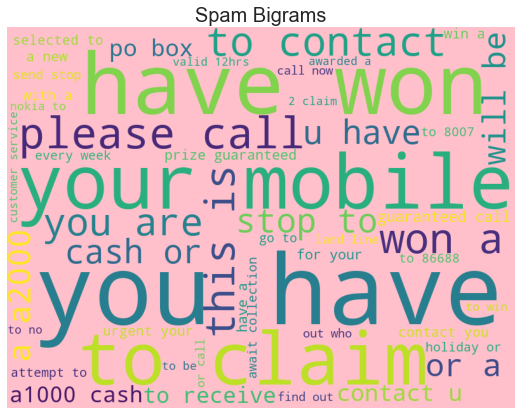

In [23]:
# create wordcloud of top 50 spam bigrams
from wordcloud import WordCloud
data = {k[0] + ' ' + k[1]: v for k, v in top50_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='pink', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Spam Bigrams',size=20)
plt.show()

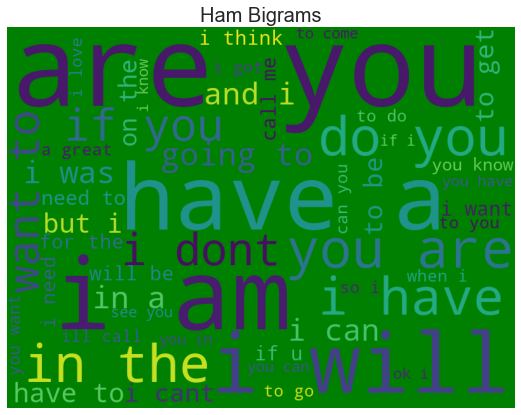

In [24]:
# create wordcloud of top 50 ham bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top50_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='green', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Ham Bigrams',size=20)
plt.show()

## Exercise 1c
Is there any overlap in the bigrams for the spam data and the ham data?

In [25]:
# use sets to find the intersection of spam and hap
overlap = set.intersection(set(top50_spam_bigrams.keys()), set(top50_ham_bigrams.keys()))
overlap

{('have', 'a'), ('to', 'be'), ('will', 'be'), ('you', 'are'), ('you', 'have')}

## Exercise 1d
Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [26]:

# split spam words and get top 20 trigrams
top20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_spam_trigrams

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(urgent, your, mobile)       18
(to, contact, u)             18
(account, statement, for)    16
(valid, 12hrs, only)         16
(from, land, line)           16
(to, contact, you)           16
(is, the, 2nd)               15
(trying, to, contact)        15
(this, is, the)              15
(cash, or, a)                15
(we, are, trying)            14
(draw, shows, that)          14
(land, line, claim)          14
(shows, that, you)           14
(are, trying, to)            14
(reply, or, call)            14
dtype: int64

In [27]:
# split ham words and get top 20 trigrams
top20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_ham_trigrams

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
(have, a, great)      25
(i, miss, you)        24
(i, love, you)        23
(i, have, to)         20
(hope, you, are)      20
(give, me, a)         19
(i, dont, know)       19
(happy, new, year)    18
(do, have, a)         17
(a, great, day)       17
(i, am, in)           16
(are, you, doing)     16
(what, are, you)      16
(on, the, way)        16
(you, want, to)       16
dtype: int64

Text(0.5, 1.0, 'Top Spam Trigrams')

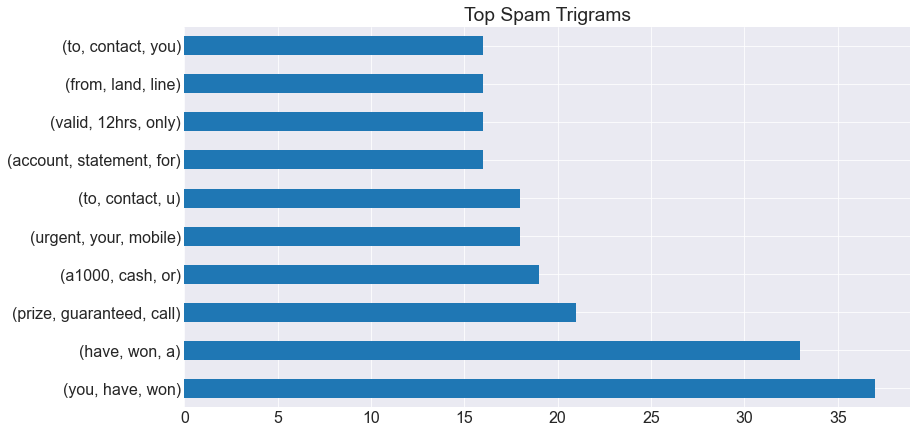

In [28]:
# plot only the top 10 spam trigrams
top20_spam_trigrams.head(10).plot.barh()
plt.title('Top Spam Trigrams')

Text(0.5, 1.0, 'Top Ham Trigrams')

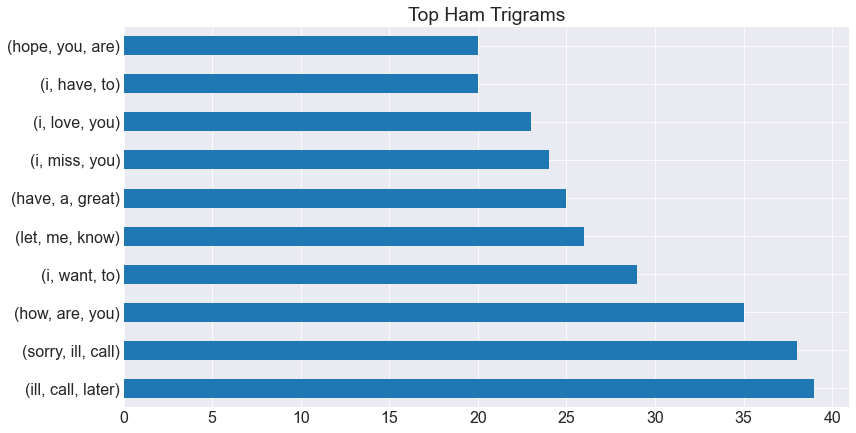

In [29]:
# plot only the top 10 ham trigrams
top20_ham_trigrams.head(10).plot.barh()
plt.title('Top Ham Trigrams')

## Exercise 3
Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [ ]:
# pull in the data
news_df = prepare.prep_clean_news_data()
news_df.head()

In [ ]:
# check number and percent by category (all equal since we selected the same amount from each page)
categories = pd.concat([news_df.category.value_counts(),
                    news_df.category.value_counts(normalize=True)], axis=1)
categories.columns = ['n', 'percent']
categories

In [ ]:
# combine all lemmatized words by category
entertainment_words = ' '.join(news_df.lemmatized[news_df.category == 'entertainment'].astype(str))
business_words = ' '.join(news_df.lemmatized[news_df.category == 'business'].astype(str))
technology_words = ' '.join(news_df.lemmatized[news_df.category == 'technology'].astype(str))
sports_words = ' '.join(news_df.lemmatized[news_df.category == 'sports'].astype(str))
all_words = ' '.join(news_df.lemmatized)

In [ ]:
# calculate word frequency by category
entertainment_words_freq = pd.Series(entertainment_words.split()).value_counts()
business_words_freq = pd.Series(business_words.split()).value_counts()
technology_words_freq = pd.Series(technology_words.split()).value_counts()
sports_words_freq = pd.Series(sports_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [ ]:
# check top entertainment word frequencies
entertainment_words_freq.head(10)

In [ ]:
# check top business word frequencies
business_words_freq.head(10)